In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)

In [18]:
R = 1e3 
q_0 = 1.602e-19

d180 = pd.read_csv('./meritve/180.csv', delimiter=';')
d180 = np.array(d180)

d160 = pd.read_csv('./meritve/160.csv', delimiter=';')
d160 = np.array(d160)

d140 = pd.read_csv('./meritve/140.csv', delimiter=';')
d140 = np.array(d140)

d120 = pd.read_csv('./meritve/120.csv', delimiter=';')
d120 = np.array(d120)

print(d180[1:, 0])

    

[-15.6 -10.4  -5.2   0. ]


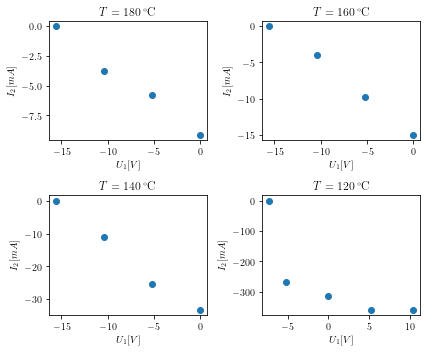

In [55]:
fig, axs = plt.subplots(2, 2, figsize=[6, 5])

aux = [[180, 160, 140, 120], axs.flat, [d180, d160, d140, d120]]


res=[]

for T, ax, data in zip(*aux): 
    U1 = data[1:, 0]
    U2 = data[1:, 1] - data[1, 1]
    I2 = U2 * 1e3 / R

    dU = np.diff(U1)
    res.append(dU)

    ax.scatter(U1, 1e3 * I2, label='meritve')

    ax.set_title(f'$T = {T}\\, \\mathrm{{^\circ C}}$')
    ax.set_ylabel(r'$I_2[mA]$')
    ax.set_xlabel(r'$U_1[V]$')

fig.tight_layout()
fig.savefig('./grafi.pdf')


In [56]:
deltaU = np.mean(list(map(np.mean, res)))
delta2U = np.mean([(deltaU - dU) ** 2 for arr in res for dU in arr])

deltaU, delta2U

(5.004999999999999, 0.693225)